In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, MaxPooling1D
from keras.utils import to_categorical
import matplotlib.pyplot as plt



In [57]:
# Load the email dataset
df = pd.read_csv(r'C:\github\Email-Spam-Detection-Using-NLP\Categories_to_finalise.csv',encoding='latin-1')

In [58]:
df.head()

,Unnamed: 0.1,Unnamed: 0,SUBJECT,BODY,AI_CAT,AI_SUBCAT,AGENT_CAT_SUBCAT_UPDATE_DATE,mail_text,cat_subcat,class_types
0,0,0,[External] Australian MBA from UWA with IIM Ko...,*|MC_PREVIEW_TEXT|* ...,PAN-Online Application,PAN-Refund not received,NaN,[External] Australian MBA from UWA with IIM Ko...,PAN-Online Application-PAN-Refund not received,0.0
1,1,1,[External] Re: PAN Correction - Ack No. P-0501...,"Dear Sir/Ma'am,Name: Rajashekar Reddy ThummaPA...",Others-Grievance addressed/pertain to other en...,Others-NRR_No Reply Required,NaN,[External] Re: PAN Correction - Ack No. P-0501...,Others-Grievance addressed/pertain to other en...,1.0
2,10,13,[External] Fwd: Non receipt of Temporary Token...,---------- Forwarded message ---------From: To...,PAN-Online Application,PAN-Refund not received,NaN,[External] Fwd: Non receipt of Temporary Token...,PAN-Online Application-PAN-Refund not received,0.0
3,3,5,[External] rahul pan.pdf,Rahul,Insufficient-invalid details,Acknowledgement or PAN not available with appl...,NaN,[External] rahul pan.pdf-Rahul,Insufficient-invalid details-Acknowledgement o...,3.0
4,11,14,[External] Money refund nahi huaa hai.,Main manojkumar rajendraprasad gupta mera pan ...,PAN-Online Application,PAN-Refund not received,NaN,[External] Money refund nahi huaa hai.-Main ma...,PAN-Online Application-PAN-Refund not received,0.0


In [59]:
len(df)

37684

In [60]:
df.dropna()

,Unnamed: 0.1,Unnamed: 0,SUBJECT,BODY,AI_CAT,AI_SUBCAT,AGENT_CAT_SUBCAT_UPDATE_DATE,mail_text,cat_subcat,class_types


In [61]:
len(df)

37684

In [62]:
# define a function to clean the tweet.
def clean_tweet(mail_text):
    '''
    tweet: String
           Input Data
    tweet: String
           Output Data
           
    func: Convert tweet to lower case
          Replace URLs with a space in the message
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace  usernames with space. The usernames are any word that starts with @.
          Replace everything not a letter or apostrophe with space
          Remove single letter words
          lemmatize, tokenize (nouns and verb), remove stop words, filter all the non-alphabetic words, then join
          them again

    '''
    
    tweet = mail_text.lower()
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet)
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet)
    #tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    
    #tweet=' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words])
    #tweet=[lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words]
    return tweet 

In [63]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd


# #gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

#wordcloud 
from wordcloud import WordCloud 

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier


print('Done')

Done


In [64]:
filtered_df =df

In [65]:
# clean the tweets and create two columns: tokenized tweet and whole tweet
filtered_df["clean_tweet"]=filtered_df["mail_text"].apply(lambda x:clean_tweet(str(x)))
filtered_df["cleaned_tweet"]=filtered_df["clean_tweet"].apply(lambda x:' '.join(x))

In [66]:
df.head()

,Unnamed: 0.1,Unnamed: 0,SUBJECT,BODY,AI_CAT,AI_SUBCAT,AGENT_CAT_SUBCAT_UPDATE_DATE,mail_text,cat_subcat,class_types,clean_tweet,cleaned_tweet
0,0,0,[External] Australian MBA from UWA with IIM Ko...,*|MC_PREVIEW_TEXT|* ...,PAN-Online Application,PAN-Refund not received,NaN,[External] Australian MBA from UWA with IIM Ko...,PAN-Online Application-PAN-Refund not received,0.0,external australian mba from uwa with iim ko...,e x t e r n a l a u s t r a l i a n m ...
1,1,1,[External] Re: PAN Correction - Ack No. P-0501...,"Dear Sir/Ma'am,Name: Rajashekar Reddy ThummaPA...",Others-Grievance addressed/pertain to other en...,Others-NRR_No Reply Required,NaN,[External] Re: PAN Correction - Ack No. P-0501...,Others-Grievance addressed/pertain to other en...,1.0,external re pan correction ack no p ...,e x t e r n a l r e p a n c o r r ...
2,10,13,[External] Fwd: Non receipt of Temporary Token...,---------- Forwarded message ---------From: To...,PAN-Online Application,PAN-Refund not received,NaN,[External] Fwd: Non receipt of Temporary Token...,PAN-Online Application-PAN-Refund not received,0.0,external fwd non receipt of temporary token...,e x t e r n a l f w d n o n r e c ...
3,3,5,[External] rahul pan.pdf,Rahul,Insufficient-invalid details,Acknowledgement or PAN not available with appl...,NaN,[External] rahul pan.pdf-Rahul,Insufficient-invalid details-Acknowledgement o...,3.0,external rahul pan pdf rahul,e x t e r n a l r a h u l p a n p d ...
4,11,14,[External] Money refund nahi huaa hai.,Main manojkumar rajendraprasad gupta mera pan ...,PAN-Online Application,PAN-Refund not received,NaN,[External] Money refund nahi huaa hai.-Main ma...,PAN-Online Application-PAN-Refund not received,0.0,external money refund nahi huaa hai main ma...,e x t e r n a l m o n e y r e f u n d ...


In [67]:

###  MODEL 0 : SEQUENTIAL KERAS ##

from tensorflow.keras.preprocessing.sequence import pad_sequences

data = filtered_df
    
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_tweet'], data['class_types'], test_size=0.2, random_state=42)

# Tokenize the emails
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to the same length
max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Fit the encoder on training labels only
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Handle unseen labels in test data
unique_labels_train = set(y_train)
y_test_encoded[y_test_encoded >= len(unique_labels_train)] = len(unique_labels_train)  # Assign special label for unseen labels

# Convert labels to categorical format
num_classes = len(unique_labels_train) + 1  # Add 1 for the special label
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)

# Build the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(Conv1D(256, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and collect history
history = model.fit(X_train_padded, y_train_categorical, validation_data=(X_test_padded, y_test_categorical), epochs=10, batch_size=32)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


Epoch 1/10
943/943 [==============================] - 714s 756ms/step - loss: 1.5881 - accuracy: 0.5092 - val_loss: 1.2892 - val_accuracy: 0.6086
Epoch 2/10
 89/943 [=>............................] - ETA: 20:43 - loss: 1.0874 - accuracy: 0.6531

KeyboardInterrupt: 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3015, 100)         5339300   
                                                                 
 conv1d_1 (Conv1D)           (None, 3011, 128)         64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                      

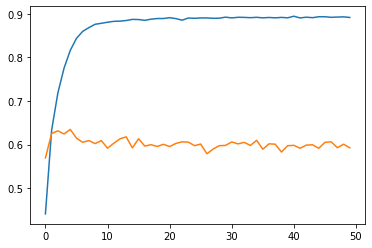

In [20]:

###  MODEL 0 : SEQUENTIAL KERAS ##

from tensorflow.keras.preprocessing.sequence import pad_sequences

data = filtered_df
    
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_tweet'], data['class_types'], test_size=0.2, random_state=42)

# Tokenize the emails
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to the same length
max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Fit the encoder on training labels only
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Handle unseen labels in test data
unique_labels_train = set(y_train)
y_test_encoded[y_test_encoded >= len(unique_labels_train)] = len(unique_labels_train)  # Assign special label for unseen labels

# Convert labels to categorical format
num_classes = len(unique_labels_train) + 1  # Add 1 for the special label
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)

# Build the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Train the model and collect history
history = model.fit(X_train_padded, y_train_categorical, validation_data=(X_test_padded, y_test_categorical), epochs=50, batch_size=32)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
